In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
temp = pd.read_csv("temperat.csv", sep=";")
temp = temp.rename(columns={'Unnamed: 0': 'Ville'})
print(temp)

            Ville  Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
0       Amsterdam      2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
1         Athenes      9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
2          Berlin     -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
3       Bruxelles      3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
4        Budapest     -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
5      Copenhague     -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
6          Dublin      4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
7        Helsinki     -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
8            Kiev     -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
9        Cracovie     -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
10       Lisbonne     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   
11        Londres      3.4      4.2   5.5    8.3  11

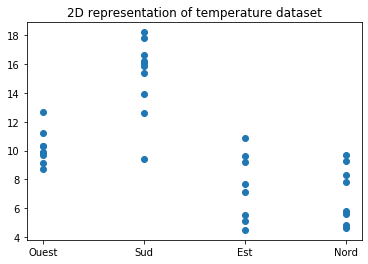

In [3]:
plt.figure()
plt.title('2D representation of temperature dataset')
plt.scatter(temp['Region'], temp['Moyenne'])
plt.show()

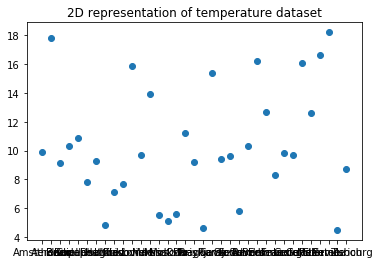

In [4]:
plt.figure()
plt.title('2D representation of temperature dataset')
plt.scatter(temp['Ville'], temp['Moyenne'])
plt.show()

In [13]:
new_temp = temp.drop(['Ville', 'Region', 'Longitude', 'Latitude'], axis=1)
print(new_temp)

    Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  Septembre  \
0       2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1       14.5   
1       9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2       23.8   
2      -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0       14.4   
3       3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8       15.0   
4      -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3       16.9   
5      -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6       13.3   
6       4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6       12.7   
7      -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9        9.7   
8      -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5       13.7   
9      -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6       13.7   
10     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9       20.4   
11      3.4      4.2   5.5    8.3  11.9  15.1     16.9  16.5       14.0   
12      5.0      6.6   9.

[[-0.82727273  0.7         4.42727273  9.22727273 14.16363636 17.55454545
  19.47272727 18.83636364 15.18181818 10.08181818  4.59090909  0.83636364
   9.5        20.3       ]
 [ 3.7125      3.9875      6.375       8.85       12.3875     15.2625
  17.35       17.075      14.5875     11.075       6.825       4.7875
  10.2125     13.7       ]
 [-5.525      -5.0125     -1.4625      4.4875     10.7375     14.8125
  16.9875     15.6625     11.05        5.6875      0.475      -3.2125
   5.375      22.5625    ]
 [ 8.8375      9.7625     11.875      14.5875     18.2625     21.975
  24.7375     24.4        21.875      17.5125     12.925       9.875
  16.2625     15.9625    ]]


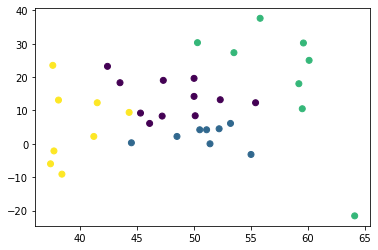

In [29]:
kmeans = KMeans(n_clusters=4,n_init=10,init='random').fit(new_temp)
centers=kmeans.cluster_centers_
print(centers)
kmeans.labels_
plt.scatter(temp['Latitude'], temp['Longitude'],c=kmeans.labels_)

In [23]:
range_n_clusters = [2,3,4,5,6,7,8,9,10] #trying to find the optimal number of clusters which suits best our dataset
sil_score = []
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10, init = 'random').fit(new_temp) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels of each cluster
    silhouette_avg = silhouette_score(new_temp, cluster_labels) # Corresponding silhouette score
    sil_score.append(silhouette_avg) # Adding the silhouette score corresponding to the number of clusters to our list so 
                                    # we can print it afterward
   
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5187111529098996
For n = 3 Silhouette_score: 0.4831014618030819
For n = 4 Silhouette_score: 0.45419340361377014
For n = 5 Silhouette_score: 0.4718324275058679
For n = 6 Silhouette_score: 0.4532401102390238
For n = 7 Silhouette_score: 0.42356262395029265
For n = 8 Silhouette_score: 0.4030601907902662
For n = 9 Silhouette_score: 0.37468407018590505
For n = 10 Silhouette_score: 0.30885013753826007


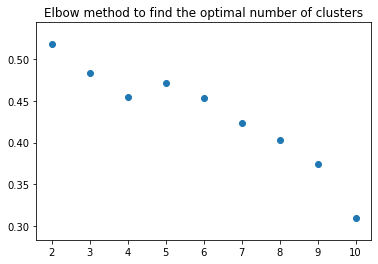

In [26]:
plt.figure()
plt.title('Elbow method to find the optimal number of clusters')
plt.scatter(range_n_clusters, sil_score)

In [35]:
# Hierarchical clustering
# First we scale our data
scaled_temp = pd.DataFrame(scale(new_temp), columns = new_temp.columns, index = new_temp.index)
# print(scale(new_temp))
# print(scaled_temp)

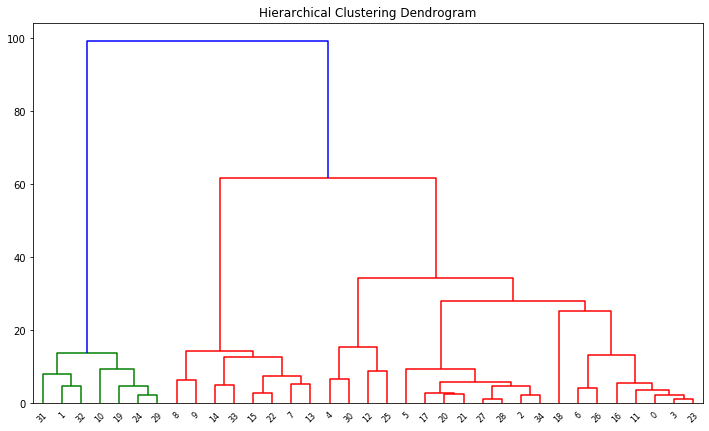

In [40]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(
    Z = linkage(new_temp, 'ward')
)
plt.show()